# Setup and Training

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
print("Unzipping raw data from Google Drive...")
!unzip /content/gdrive/MyDrive/archive.zip -d /content/
print("Unzip complete!")

Streaming output truncated to the last 5000 lines.
  inflating: /content/val/night_vision/1.jpeg  
  inflating: /content/val/night_vision/10.jpeg  
  inflating: /content/val/night_vision/100.jpeg  
  inflating: /content/val/night_vision/1000.jpeg  
  inflating: /content/val/night_vision/1001.jpeg  
  inflating: /content/val/night_vision/1002.jpeg  
  inflating: /content/val/night_vision/1003.jpeg  
  inflating: /content/val/night_vision/1004.jpeg  
  inflating: /content/val/night_vision/1005.jpeg  
  inflating: /content/val/night_vision/1006.jpeg  
  inflating: /content/val/night_vision/1007.jpeg  
  inflating: /content/val/night_vision/1008.jpeg  
  inflating: /content/val/night_vision/1009.jpeg  
  inflating: /content/val/night_vision/101.jpeg  
  inflating: /content/val/night_vision/1010.jpeg  
  inflating: /content/val/night_vision/1011.jpeg  
  inflating: /content/val/night_vision/1012.jpeg  
  inflating: /content/val/night_vision/1013.jpeg  
  inflating: /content/val/night_vision

In [ ]:
print("--- First 5 files in /content/train/ground_truth/ ---")
!ls /content/train/ground_truth | head -n 5

print("\n--- First 5 files in /content/train/night_vision/ ---")
!ls /content/train/night_vision | head -n 5

--- First 5 files in /content/train/ground_truth/ ---
0.jpeg
10000.jpeg
10001.jpeg
10002.jpeg
10003.jpeg

--- First 5 files in /content/train/night_vision/ ---
0.jpeg
10000.jpeg
10001.jpeg
10002.jpeg
10003.jpeg


In [ ]:
import os
from PIL import Image, ImageFile
import subprocess

# --- (PART 1) Resize all images ---
ImageFile.LOAD_TRUNCATED_IMAGES = True
base_dir = '/content'
target_size = (256, 256)
sub_folders = [
    'train/ground_truth', 'train/night_vision',
    'val/ground_truth', 'val/night_vision',
    'test/ground_truth', 'test/night_vision'
]

print(f"Starting image resizing... Target size: {target_size}")
total_resized = 0
for sub_folder in sub_folders:
    dir_path = os.path.join(base_dir, sub_folder)
    if not os.path.exists(dir_path):
        print(f"Warning: Folder not found, skipping: {dir_path}")
        continue
    print(f"\nProcessing folder: {dir_path}")
    img_list = [f for f in os.listdir(dir_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

    for img_name in img_list:
        img_path = os.path.join(dir_path, img_name)
        try:
            with Image.open(img_path) as img:
                img_resized = img.resize(target_size, Image.Resampling.LANCZOS)
                img_resized.convert('RGB').save(img_path)
                total_resized += 1
        except Exception as e:
            print(f"  Error resizing {img_name}: {e}. Skipping.")
print(f"\n\nResize complete! Total images processed: {total_resized}")
print("-----------------------------------------------------")

print("Starting image combining (using custom script)...")

OUTPUT_DIR = "/content/nightvision_final"
splits_to_process = ['train', 'val', 'test']

for split in splits_to_process:
    fold_A = f"/content/{split}/ground_truth"
    fold_B = f"/content/{split}/night_vision"
    fold_AB = f"{OUTPUT_DIR}/{split}"

    print(f"\nCombining {split} folder...")
    os.makedirs(fold_AB, exist_ok=True)

    img_list = [f for f in os.listdir(fold_A) if f.endswith(('.jpg', '.png', '.jpeg'))]
    if not img_list:
        print(f"Warning: No images found in {fold_A}")
        continue

    combined_count = 0
    for img_name in img_list:
        path_A = os.path.join(fold_A, img_name)
        path_B = os.path.join(fold_B, img_name)

        if not os.path.exists(path_B):
            print(f"  Skipping {img_name}: Match not found in {fold_B}")
            continue

        try:
            with Image.open(path_A) as img_A, Image.open(path_B) as img_B:
                width, height = img_A.size
                combined_img = Image.new('RGB', (width * 2, height))
                combined_img.paste(img_A, (0, 0))
                combined_img.paste(img_B, (width, 0))

                save_path = os.path.join(fold_AB, img_name)
                combined_img.save(save_path)
                combined_count += 1
        except Exception as e:
            print(f"  Error combining {img_name}: {e}")

    print(f"Finished combining {split}. Total pairs combined: {combined_count}")

print("\nData preparation complete!")
print("-----------------------------------------------------")

print("\n--- Verifying TRAIN folder (showing first 5 files): ---")
!ls -l /content/nightvision_final/train | head -n 5

print("\n--- Verifying VAL folder (showing first 5 files): ---")
!ls -l /content/nightvision_final/val | head -n 5

print("\n--- Verifying TEST folder (showing first 5 files): ---")
!ls -l /content/nightvision_final/test | head -n 5

Starting image resizing... Target size: (256, 256)

Processing folder: /content/train/ground_truth

Processing folder: /content/train/night_vision


KeyboardInterrupt: 

In [ ]:
# We must be in the repo folder to run train.py
%cd /content/pytorch-CycleGAN-and-pix2pix/

print("Starting training... This will take a long time.")
print(f"Dataset: /content/nightvision_final")
print(f"Checkpoints will be saved to: /content/gdrive/MyDrive/pix2pix_checkpoints")

!python train.py --dataroot /content/nightvision_final \
                 --name nightvision_pix2pix \
                 --model pix2pix \
                 --direction AtoB \
                 --no_html \
                 --checkpoints_dir /content/gdrive/MyDrive/pix2pix_checkpoints

print("Training finished!")

/content/pytorch-CycleGAN-and-pix2pix
Starting training... This will take a long time.
Dataset: /content/nightvision_final
Checkpoints will be saved to: /content/gdrive/MyDrive/pix2pix_checkpoints
----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: /content/gdrive/MyDrive/pix2pix_checkpoints	[default: ./checkpoints]
           continue_train: False                         
                crop_size: 256                           
                 dataroot: /content/nightvision_final    	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
             display_freq: 400                           
          display_winsize: 256                           
                    epoch: latest                        
              epoch_count: 1                             
           

# Testing to check results on nightvision Dataset

In [ ]:
# We must be in the repo folder to run test.py
%cd /content/pytorch-CycleGAN-and-pix2pix/

print("Starting testing...")
print("This will load your latest model from Google Drive.")

!python test.py --dataroot /content/nightvision_final \
                --name nightvision_pix2pix \
                --model pix2pix \
                --direction AtoB \
                --checkpoints_dir /content/gdrive/MyDrive/pix2pix_checkpoints

print("Testing complete!")

In [ ]:
from IPython.display import HTML, display

# Path to the results file
results_path = "/content/pytorch-CycleGAN-and-pix2pix/results/nightvision_pix2pix/test_latest/index.html"

# Display the link
print(f"Click this link to view your results:")
display(HTML(f'<a href="{results_path}" target="_blank">{results_path}</a>'))

# Results on VisDrone

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# Go to the main content folder
%cd /content/

# Clean up any old clones
!rm -rf pytorch-CycleGAN-and-pix2pix

# Clone the repository
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

# Move INTO the new folder
%cd /content/pytorch-CycleGAN-and-pix2pix/

# Install the correct dependencies
!pip install pillow dominate visdom

Mounted at /content/gdrive
/content
Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2619, done.
remote: Total 2619 (delta 0), reused 0 (delta 0), pack-reused 2619 (from 1)
Receiving objects: 100% (2619/2619), 8.24 MiB | 30.89 MiB/s, done.
Resolving deltas: 100% (1654/1654), done.
/content/pytorch-CycleGAN-and-pix2pix
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408195 sha256=00ff15603a89438fba74dfd585e7da9ca1adbf86e34c39829b5f397e9daacd22
  Stored in directory: /root/.cache/pip/wheels/37/6c/38/64eeaa310e325aacda723e6df1f79ab5e9f31ba195264e04a8
Successfully built visdom


In [ ]:
!pip install gdown
!gdown '1a2oHjcEcwXP8oUF95qiwrqzACb2YlUhn' -O /content/VisDrone2019-DET-train.zip

print("Download complete!")
print("Unzipping raw data...")
!unzip /content/VisDrone2019-DET-train.zip -d /content/
!mv /content/VisDrone2019-DET-train /content/my_raw_data

print("Unzip and rename complete! You are ready for the next step.")

Streaming output truncated to the last 5000 lines.
 extracting: /content/VisDrone2019-DET-train/images/9999937_00000_d_0000141.jpg  
 extracting: /content/VisDrone2019-DET-train/images/9999937_00000_d_0000142.jpg  
 extracting: /content/VisDrone2019-DET-train/images/9999937_00000_d_0000143.jpg  
 extracting: /content/VisDrone2019-DET-train/images/9999937_00000_d_0000144.jpg  
  inflating: /content/VisDrone2019-DET-train/images/9999937_00000_d_0000145.jpg  
 extracting: /content/VisDrone2019-DET-train/images/9999937_00000_d_0000146.jpg  
 extracting: /content/VisDrone2019-DET-train/images/9999937_00000_d_0000147.jpg  
 extracting: /content/VisDrone2019-DET-train/images/9999937_00000_d_0000148.jpg  
 extracting: /content/VisDrone2019-DET-train/images/9999937_00000_d_0000149.jpg  
  inflating: /content/VisDrone2019-DET-train/images/9999937_00000_d_0000150.jpg  
  inflating: /content/VisDrone2019-DET-train/images/9999937_00000_d_0000151.jpg  
  inflating: /content/VisDrone2019-DET-train/im

In [ ]:
import os
from PIL import Image, ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True
image_dir = '/content/my_raw_data/images'
target_size = (256, 256)

print(f"Starting image resizing for {image_dir}...")
print(f"Target size: {target_size}")

if not os.path.exists(image_dir):
    print(f"Error: Folder not found. Please check path: {image_dir}")
else:
    img_list = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
    total_resized = 0

    for img_name in img_list:
        img_path = os.path.join(image_dir, img_name)
        try:
            with Image.open(img_path) as img:
                img_resized = img.resize(target_size, Image.Resampling.LANCZOS)
                img_resized.convert('RGB').save(img_path)
                total_resized += 1
        except Exception as e:
            print(f"  Error resizing {img_name}: {e}. Skipping.")

    print(f"\n\nResize complete! Total images processed: {total_resized}")

Starting image resizing for /content/my_raw_data/images...
Target size: (256, 256)


Resize complete! Total images processed: 6471


In [ ]:
# We must be in the repo folder to run test.py
%cd /content/pytorch-CycleGAN-and-pix2pix/

print("Starting testing (using the correct inference model)...")
print("This will load your trained model from Google Drive.")

!python test.py --dataroot /content/my_raw_data/images \
                --dataset_mode single \
                --name nightvision_pix2pix \
                --checkpoints_dir /content/gdrive/MyDrive/pix2pix_checkpoints \
                --model test \
                --netG unet_256 \
                --norm batch

print("Testing complete!")

/content/pytorch-CycleGAN-and-pix2pix
Starting testing (using the correct inference model)...
This will load your trained model from Google Drive.
----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /content/gdrive/MyDrive/pix2pix_checkpoints	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: /content/my_raw_data/images   	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
   

In [ ]:
print("Zipping results...")

# 1. Zip the folder containing your images
!zip -r /content/pix2pix_results.zip /content/pytorch-CycleGAN-and-pix2pix/results/nightvision_pix2pix/test_latest/

print("Zip file created at /content/pix2pix_results.zip")

# 2. Provide the download link
from google.colab import files
files.download('/content/pix2pix_results.zip')

Zipping results...
updating: content/pytorch-CycleGAN-and-pix2pix/results/nightvision_pix2pix/test_latest/ (stored 0%)
updating: content/pytorch-CycleGAN-and-pix2pix/results/nightvision_pix2pix/test_latest/images/ (stored 0%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/nightvision_pix2pix/test_latest/index.html (deflated 96%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/nightvision_pix2pix/test_latest/images/0000047_01000_d_0000090_real.png (deflated 0%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/nightvision_pix2pix/test_latest/images/0000040_02454_d_0000068_fake.png (deflated 0%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/nightvision_pix2pix/test_latest/images/0000002_00448_d_0000015_fake.png (deflated 0%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/nightvision_pix2pix/test_latest/images/0000031_02000_d_0000041_fake.png (deflated 0%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/nightvision_pix2pix/test_latest/images/000

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--- Starting Side-by-Side Visualization with Uploaded Images ---
Successfully loaded annotations from 0000002_00448_d_0000015.txt
Loading night vision image from: 0000002_00448_d_0000015_fake.png
Night vision image loaded. Original size: (256, 256)
Loading original colorful image from: 0000002_00448_d_0000015.jpg
Detected original colorful image size: (960, 540)
Upscaling night vision image (from (256, 256)) to (960, 540)...
Parsing and drawing annotations on BOTH images...
Drew 95 bounding boxes.
Saving final visualization to /content/mismatched_result_uploaded.png...
Saving original image with boxes to /content/original_with_boxes.png...

--- VISUALIZATION COMPLETE ---
Displaying side-by-side comparison:


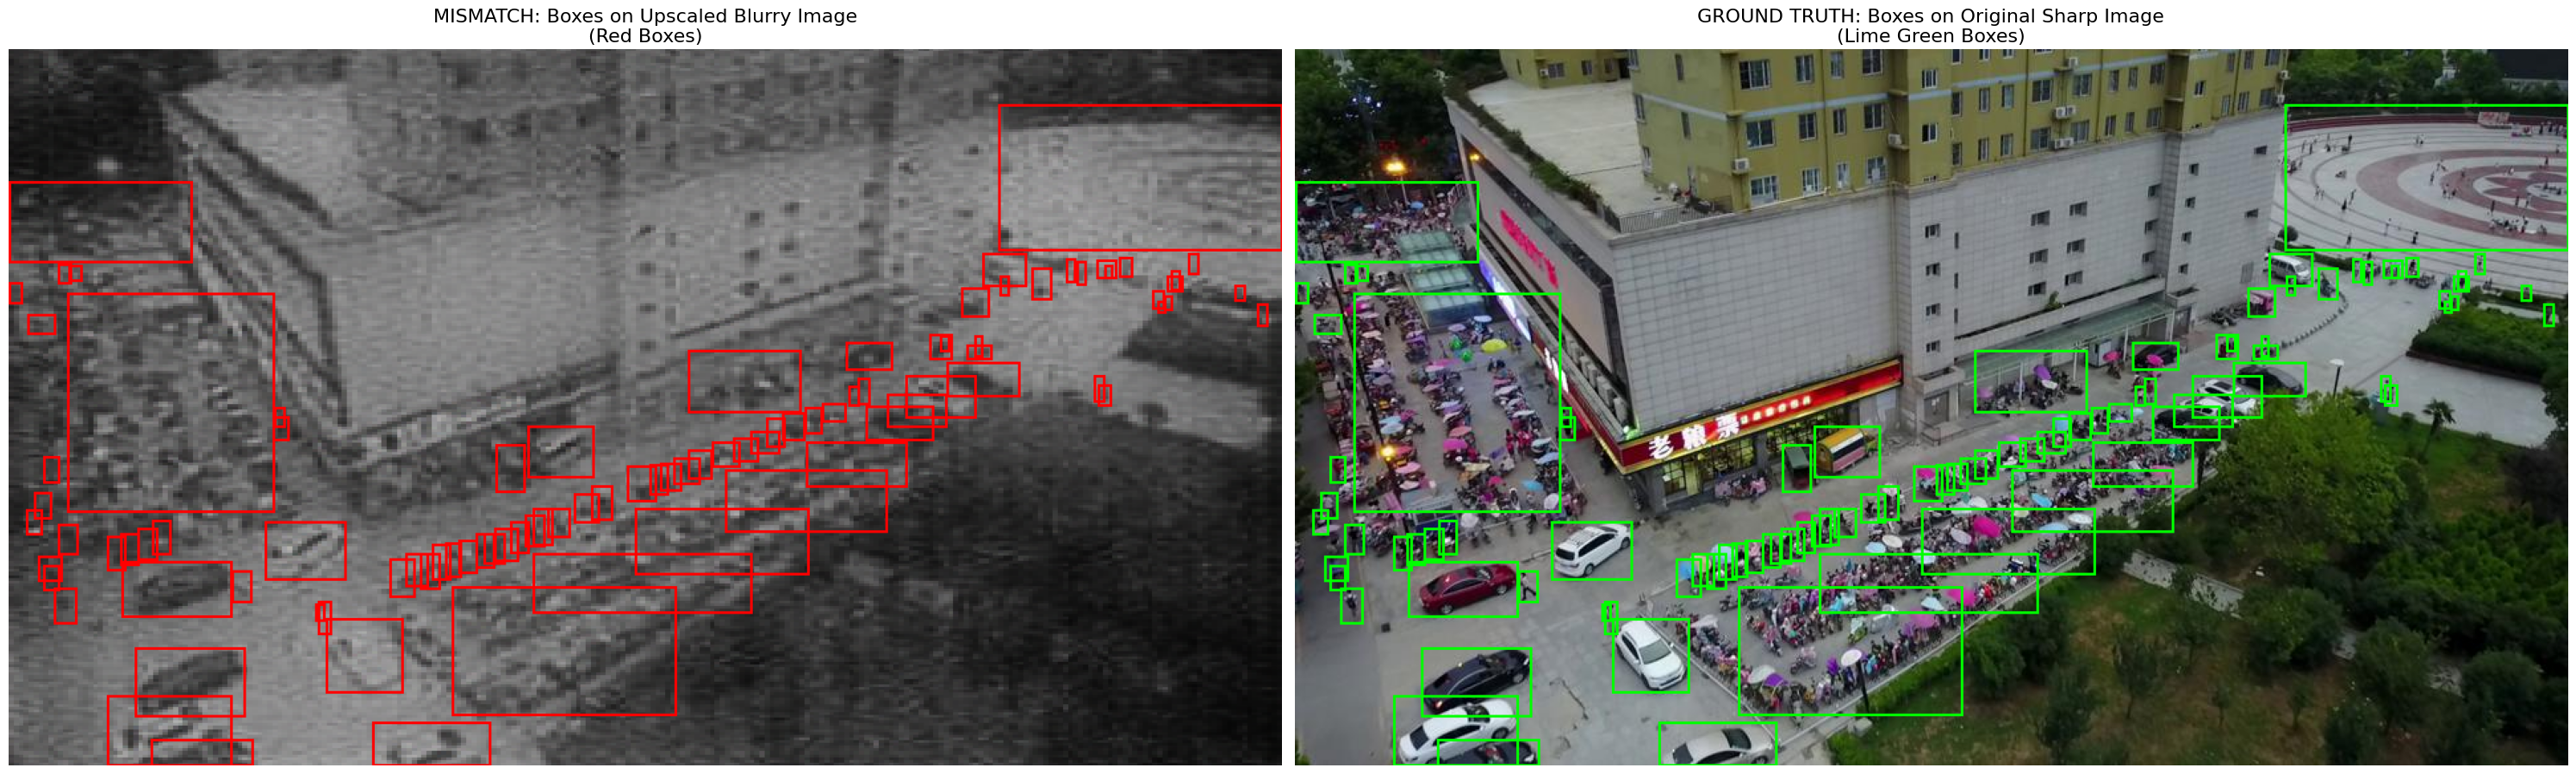

In [ ]:
import os
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

print("--- Starting Side-by-Side Visualization with Uploaded Images ---")

# --- 1. Define File Paths ---
NIGHT_VISION_IMG_PATH = '0000002_00448_d_0000015_fake.png'
ORIGINAL_COLORFUL_IMG_PATH = '0000002_00448_d_0000015.jpg'
ANNOTATION_FILE_PATH = '0000002_00448_d_0000015.txt'

# --- 2. Load Annotation Data ---
try:
    with open(ANNOTATION_FILE_PATH, 'r') as f:
        ANNOTATION_DATA = f.read()
    print(f"Successfully loaded annotations from {ANNOTATION_FILE_PATH}")
except FileNotFoundError:
    print(f"ERROR: Annotation file not found at {ANNOTATION_FILE_PATH}")
    raise

# Define output paths
FINAL_IMAGE_PATH = "/content/mismatched_result_uploaded.png"
ORIGINAL_WITH_BOXES_PATH = "/content/original_with_boxes.png"

# --- 3. Load Night Vision Image ---
print(f"Loading night vision image from: {NIGHT_VISION_IMG_PATH}")
try:
    img_night_vision_256 = Image.open(NIGHT_VISION_IMG_PATH).convert("RGB")
    print(f"Night vision image loaded. Original size: {img_night_vision_256.size}")
except FileNotFoundError:
    print(f"ERROR: Night vision image not found at {NIGHT_VISION_IMG_PATH}")
    raise

# --- 4. Load Original Colorful Image and Get Size ---
print(f"Loading original colorful image from: {ORIGINAL_COLORFUL_IMG_PATH}")
try:
    # Keep the original image in memory to draw on it
    img_orig_colorful = Image.open(ORIGINAL_COLORFUL_IMG_PATH).convert("RGB")
    ORIGINAL_SIZE = img_orig_colorful.size  # This gets (width, height)
    print(f"Detected original colorful image size: {ORIGINAL_SIZE}")
except FileNotFoundError:
    print(f"ERROR: Original colorful image not found at {ORIGINAL_COLORFUL_IMG_PATH}")
    raise

# --- 5. Upscale the Night Vision Image ---
print(f"Upscaling night vision image (from {img_night_vision_256.size}) to {ORIGINAL_SIZE}...")
# Use NEAREST to see the pixelation clearly
img_upscaled_night_vision = img_night_vision_256.resize(ORIGINAL_SIZE, Image.Resampling.NEAREST)

# --- 6. Prepare to Draw on Both Images ---
# Create a draw object for the blurry, upscaled image
draw_upscaled = ImageDraw.Draw(img_upscaled_night_vision)
# Create a draw object for the sharp, original image
draw_orig = ImageDraw.Draw(img_orig_colorful)

# --- 7. Parse and Draw Annotations on Both Images ---
print("Parsing and drawing annotations on BOTH images...")
box_count = 0
for line in ANNOTATION_DATA.strip().split('\n'):
    parts = line.strip().split(',')
    if len(parts) < 8: # VisDrone format has at least 8 parts
        continue

    # VisDrone format: <x_min>,<y_min>,<width>,<height>,...
    x_min = int(parts[0])
    y_min = int(parts[1])
    width = int(parts[2])
    height = int(parts[3])

    # Calculate x_max, y_max
    x_max = x_min + width
    y_max = y_min + height

    # Draw the rectangle on the blurry image (in Red)
    draw_upscaled.rectangle(
        [x_min, y_min, x_max, y_max],
        outline="red",  # Red box
        width=2
    )

    # Draw the rectangle on the sharp original image (in Lime Green)
    draw_orig.rectangle(
        [x_min, y_min, x_max, y_max],
        outline="lime", # Lime green box
        width=2
    )
    box_count += 1

print(f"Drew {box_count} bounding boxes.")

# --- 8. Save and Display the Results ---
print(f"Saving final visualization to {FINAL_IMAGE_PATH}...")
img_upscaled_night_vision.save(FINAL_IMAGE_PATH)
print(f"Saving original image with boxes to {ORIGINAL_WITH_BOXES_PATH}...")
img_orig_colorful.save(ORIGINAL_WITH_BOXES_PATH)


print("\n--- VISUALIZATION COMPLETE ---")
print("Displaying side-by-side comparison:")

# Create a figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 15))

# Plot 1: Mismatched image (Blurry)
ax1.imshow(img_upscaled_night_vision)
ax1.set_title(f"MISMATCH: Boxes on Upscaled Blurry Image\n(Red Boxes)", fontsize=16)
ax1.axis('off')

# Plot 2: Correct image (Sharp)
ax2.imshow(img_orig_colorful)
ax2.set_title(f"GROUND TRUTH: Boxes on Original Sharp Image\n(Lime Green Boxes)", fontsize=16)
ax2.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image

# The filename is hardcoded as requested
filename = '9999999_00875_d_0000401.jpg'

try:
    # Open the image file
    with Image.open(filename) as img:
        # Get dimensions (width, height)
        width, height = img.size

        print(f"Image: {filename}")
        print(f"Dimensions: {width} x {height}")
        print(f"Width: {width} pixels")
        print(f"Height: {height} pixels")

except FileNotFoundError:
    print(f"ERROR: File not found: '{filename}'")
    print("Please make sure you have uploaded the file and it is named exactly 'filename.png'.")
except Exception as e:
    print(f"Error opening image: {e}")
    print("Is the file a valid image (like .jpg or .png)?")

Image: 9999999_00875_d_0000401.jpg
Dimensions: 2000 x 1500
Width: 2000 pixels
Height: 1500 pixels


In [ ]:
import os
import zipfile
import shutil
import glob
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# --- 1. Mount Google Drive ---
print("Mounting Google Drive...")
drive.mount('/content/drive')
print("Drive mounted successfully.")

# --- 2. Define All Paths ---
drive_base_path = '/content/drive/My Drive'
temp_work_dir = '/content/visdrone_verification' # Local Colab processing folder

# --- Source Zip Paths ---
visdrone_zip_path = os.path.join(drive_base_path, 'VisDrone2019-DET-train.zip')
pix2pix_zip_path = os.path.join(drive_base_path, 'pix2pix_results.zip')

# --- Unzipped Folder Structures ---
visdrone_unzip_dir = os.path.join(temp_work_dir, 'VisDrone2019-DET-train')
pix2pix_unzip_dir = os.path.join(temp_work_dir, 'pix2pix_results')

# --- Specific Content Paths (based on your description) ---
original_images_path = os.path.join(visdrone_unzip_dir, 'images')
original_annotations_path = os.path.join(visdrone_unzip_dir, 'annotations')
fake_images_path = os.path.join(pix2pix_unzip_dir, 'content/pytorch-CycleGAN-and-pix2pix/results/nightvision_pix2pix/test_latest/images')

# --- 3. ⬇️ SET YOUR SAMPLE FILENAME HERE ---
# ---
# Change this string to test different images.
# Do NOT include .jpg, .txt, or _fake.png
# ---


Mounting Google Drive...
Mounted at /content/drive
Drive mounted successfully.


In [ ]:
# --- 4. Create local directories ---
os.makedirs(temp_work_dir, exist_ok=True)
print(f"Working directory created at: {temp_work_dir}")

# --- 5. Unzip VisDrone (if not already unzipped) ---
if not os.path.exists(visdrone_unzip_dir):
    print(f"Unzipping {visdrone_zip_path}...")
    try:
        with zipfile.ZipFile(visdrone_zip_path, 'r') as zip_ref:
            zip_ref.extractall(temp_work_dir)
        print("VisDrone unzipped successfully.")
    except FileNotFoundError:
        print(f"ERROR: File not found at {visdrone_zip_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("VisDrone folder already exists. Skipping unzip.")

# --- 6. Unzip Pix2Pix Results (if not already unzipped) ---
if not os.path.exists(pix2pix_unzip_dir):
    print(f"Unzipping {pix2pix_zip_path}...")
    try:
        with zipfile.ZipFile(pix2pix_zip_path, 'r') as zip_ref:
            zip_ref.extractall(pix2pix_unzip_dir)
        print("Pix2pix results unzipped successfully.")
    except FileNotFoundError:
        print(f"ERROR: File not found at {pix2pix_zip_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("Pix2pix results folder already exists. Skipping unzip.")

print("\n✅ Setup complete. You can now run Cell 3.")

Working directory created at: /content/visdrone_verification
Unzipping /content/drive/My Drive/VisDrone2019-DET-train.zip...
VisDrone unzipped successfully.
Unzipping /content/drive/My Drive/pix2pix_results.zip...
Pix2pix results unzipped successfully.

✅ Setup complete. You can now run Cell 3.


In [ ]:
sample_filename_base = "9999999_00875_d_0000401"

--- Starting verification for: 9999999_00875_d_0000401 ---
Found Original Image: /content/visdrone_verification/VisDrone2019-DET-train/images/9999999_00875_d_0000401.jpg
Found Annotation File: /content/visdrone_verification/VisDrone2019-DET-train/annotations/9999999_00875_d_0000401.txt
Found Fake Image: /content/visdrone_verification/pix2pix_results/content/pytorch-CycleGAN-and-pix2pix/results/nightvision_pix2pix/test_latest/images/9999999_00875_d_0000401_fake.png
Loaded 48 bounding boxes.
Displaying results... Check if boxes align on both images.


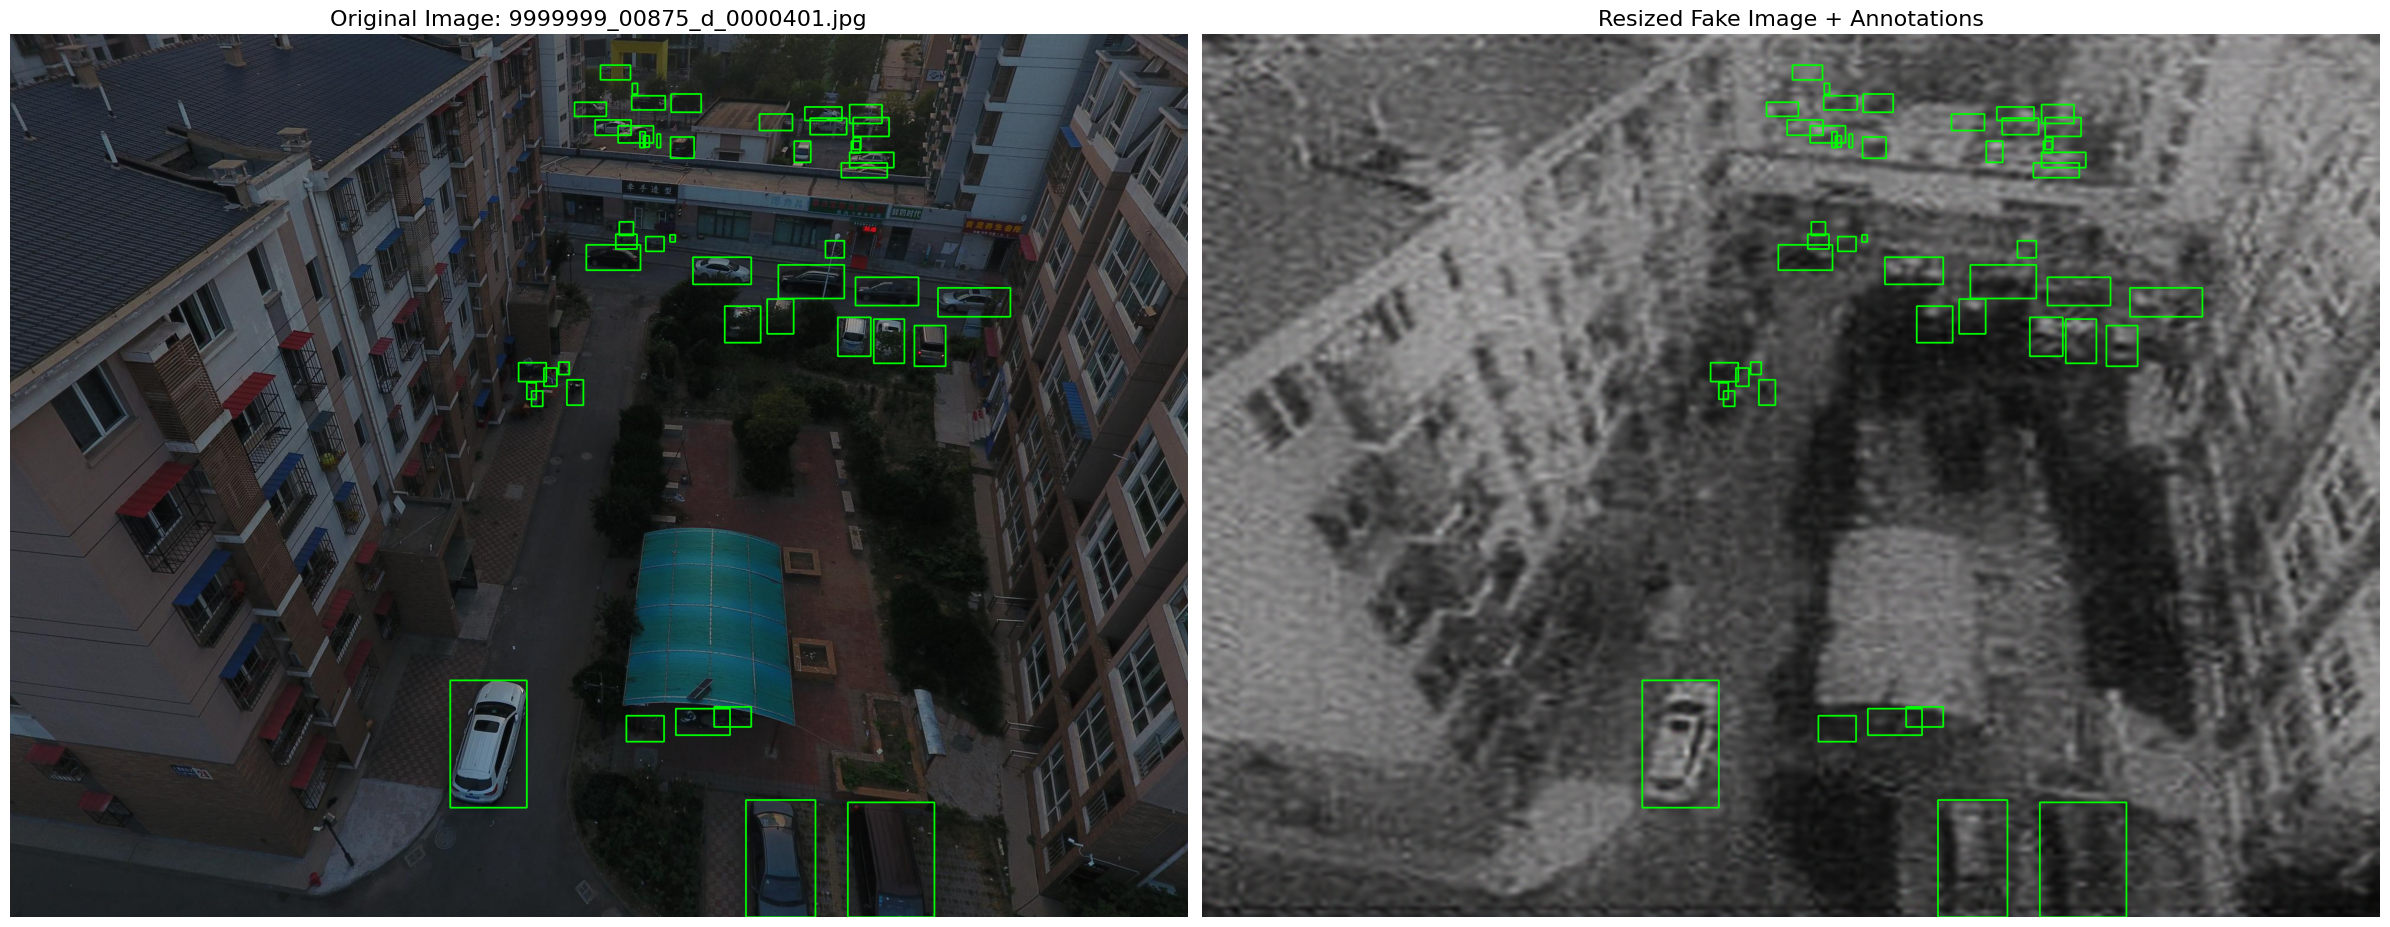

In [ ]:
print(f"--- Starting verification for: {sample_filename_base} ---")

# --- 1. Construct file paths for the sample ---
original_img_path = os.path.join(original_images_path, f"{sample_filename_base}.jpg")
annotation_file_path = os.path.join(original_annotations_path, f"{sample_filename_base}.txt")

# The fake image could be .png or .jpg, so we check for both
fake_img_path_png = os.path.join(fake_images_path, f"{sample_filename_base}_fake.png")
fake_img_path_jpg = os.path.join(fake_images_path, f"{sample_filename_base}_fake.jpg")

fake_img_path = None
if os.path.exists(fake_img_path_png):
    fake_img_path = fake_img_path_png
elif os.path.exists(fake_img_path_jpg):
    fake_img_path = fake_img_path_jpg

# --- 2. Check if all 3 files exist ---
if not all(os.path.exists(p) for p in [original_img_path, annotation_file_path, fake_img_path]):
    print("❌ ERROR: One or more files are missing for this sample.")
    if not os.path.exists(original_img_path): print(f"Missing: {original_img_path}")
    if not os.path.exists(annotation_file_path): print(f"Missing: {annotation_file_path}")
    if fake_img_path is None: print(f"Missing fake image for {sample_filename_base} in {fake_images_path}")
else:
    print(f"Found Original Image: {original_img_path}")
    print(f"Found Annotation File: {annotation_file_path}")
    print(f"Found Fake Image: {fake_img_path}")

    # --- 3. Load Annotations ---
    bboxes = []
    with open(annotation_file_path, 'r') as f:
        for line in f:
            parts = line.strip().split(',')
            # VisDrone format: <x_left>,<y_top>,<width>,<height>,...
            x = int(parts[0])
            y = int(parts[1])
            w = int(parts[2])
            h = int(parts[3])
            bboxes.append((x, y, w, h))
    print(f"Loaded {len(bboxes)} bounding boxes.")

    # Define drawing settings
    BOX_COLOR = (0, 255, 0) # Green
    BOX_THICKNESS = 2

    # --- 4. Process Original Image ---
    original_pil = Image.open(original_img_path)
    original_size = original_pil.size  # (width, height)
    original_cv = cv2.cvtColor(np.array(original_pil), cv2.COLOR_RGB2BGR)

    # Draw boxes
    for (x, y, w, h) in bboxes:
        cv2.rectangle(original_cv, (x, y), (x + w, y + h), BOX_COLOR, BOX_THICKNESS)

    # --- 5. Process "Fake" Night Vision Image ---
    fake_pil = Image.open(fake_img_path)

    # !! CRUCIAL STEP: Resize fake image to original's size !!
    resized_fake_pil = fake_pil.resize(original_size, Image.LANCZOS)

    # Convert PIL to OpenCV format (ensure 3 channels for color boxes)
    resized_fake_np = np.array(resized_fake_pil)
    if len(resized_fake_np.shape) == 2: # Grayscale
        fake_cv = cv2.cvtColor(resized_fake_np, cv2.COLOR_GRAY2BGR)
    else: # Already has channels (e.g., RGB)
        fake_cv = cv2.cvtColor(resized_fake_np, cv2.COLOR_RGB2BGR)

    # Draw the *same* boxes
    for (x, y, w, h) in bboxes:
        cv2.rectangle(fake_cv, (x, y), (x + w, y + h), BOX_COLOR, BOX_THICKNESS)

    # --- 6. Display Side-by-Side ---
    print("Displaying results... Check if boxes align on both images.")

    # Convert back to RGB for matplotlib
    original_rgb = cv2.cvtColor(original_cv, cv2.COLOR_BGR2RGB)
    fake_rgb = cv2.cvtColor(fake_cv, cv2.COLOR_BGR2RGB)

    fig, ax = plt.subplots(1, 2, figsize=(24, 12))

    ax[0].imshow(original_rgb)
    ax[0].set_title(f'Original Image: {sample_filename_base}.jpg', fontsize=16)
    ax[0].axis('off')

    ax[1].imshow(fake_rgb)
    ax[1].set_title(f'Resized Fake Image + Annotations', fontsize=16)
    ax[1].axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
# --- 1. Define Output Paths ---
# (Uses 'temp_work_dir' from Cell 1)
modified_dataset_path = os.path.join(temp_work_dir, 'modified_visdrone')
new_images_path = os.path.join(modified_dataset_path, 'images')
new_annotations_path = os.path.join(modified_dataset_path, 'annotations')

# --- 2. Create the new directory structure ---
print(f"Creating new directory structure at: {modified_dataset_path}")

# Clean up from previous runs, just in case
if os.path.exists(modified_dataset_path):
    print("Found old 'modified_visdrone' folder. Removing it.")
    shutil.rmtree(modified_dataset_path)

os.makedirs(new_images_path, exist_ok=True)
os.makedirs(new_annotations_path, exist_ok=True)

print("✅ Output directories created.")

Creating new directory structure at: /content/visdrone_verification/modified_visdrone
✅ Output directories created.


In [ ]:
# (Uses 'original_annotations_path' from Cell 1 and 'new_annotations_path' from Cell 4)
print(f"Copying annotations from: {original_annotations_path}")
print(f"Copying annotations to:   {new_annotations_path}")

try:
    # Use shutil.copytree to copy all contents
    # dirs_exist_ok=True allows it to copy into the (already existing) folder
    shutil.copytree(original_annotations_path, new_annotations_path, dirs_exist_ok=True)
    print(f"✅ Successfully copied all annotations.")
except Exception as e:
    print(f"❌ ERROR copying annotations: {e}")

Copying annotations from: /content/visdrone_verification/VisDrone2019-DET-train/annotations
Copying annotations to:   /content/visdrone_verification/modified_visdrone/annotations
✅ Successfully copied all annotations.


In [ ]:
from tqdm.auto import tqdm # For a nice progress bar
from PIL import Image

print("Starting batch processing of all images...")
print(f"Source: {original_images_path}")
print(f"Fake Source: {fake_images_path}")
print(f"Destination: {new_images_path}")

# Get a list of all original image files
# (Uses 'original_images_path' from Cell 1)
original_image_files = glob.glob(os.path.join(original_images_path, '*.jpg'))

if not original_image_files:
    print(f"❌ ERROR: No .jpg files found in {original_images_path}. Check paths.")
else:
    print(f"Found {len(original_image_files)} original images to process.")

    missing_fakes = 0

    # Loop through every original image
    for original_img_path in tqdm(original_image_files, desc="Processing images"):

        # e.g., "0000002_00448_d_0000015.jpg"
        base_filename = os.path.basename(original_img_path)

        # e.g., "0000002_00448_d_0000015"
        filename_no_ext = os.path.splitext(base_filename)[0]

        # Final output path: /content/visdrone_verification/modified_visdrone/images/0000002_00448_d_0000015.jpg
        output_img_path = os.path.join(new_images_path, base_filename)

        # --- Find the corresponding fake image (could be .png or .jpg) ---
        # (Uses 'fake_images_path' from Cell 1)
        fake_img_path = None
        fake_png = os.path.join(fake_images_path, f"{filename_no_ext}_fake.png")
        fake_jpg = os.path.join(fake_images_path, f"{filename_no_ext}_fake.jpg")

        if os.path.exists(fake_png):
            fake_img_path = fake_png
        elif os.path.exists(fake_jpg):
            fake_img_path = fake_jpg
        # ---

        if fake_img_path:
            try:
                # 1. Open original image to get its size
                with Image.open(original_img_path) as original_img:
                    original_size = original_img.size # (width, height)

                # 2. Open the "fake" image
                with Image.open(fake_img_path) as fake_img:

                    # 3. Resize the "fake" image to the original's size
                    # We also .convert('RGB') to handle PNGs or Grayscale images
                    # This ensures they can be saved as a standard .jpg
                    resized_fake_img = fake_img.resize(original_size, Image.LANCZOS).convert('RGB')

                    # 4. Save the resized image to the new location with the original name
                    # We explicitly save as 'JPEG'
                    resized_fake_img.save(output_img_path, 'JPEG')

            except Exception as e:
                print(f"Error processing {base_filename}: {e}")
        else:
            # This will log if a matching fake image is not found
            if missing_fakes < 10: # Avoid spamming the log
                print(f"Warning: Fake image not found for {base_filename}")
            elif missing_fakes == 10:
                print("... (suppressing further missing file warnings) ...")
            missing_fakes += 1

    print(f"✅ Image processing complete.")
    if missing_fakes > 0:
        print(f"Total missing fake images: {missing_fakes}")

Starting batch processing of all images...
Source: /content/visdrone_verification/VisDrone2019-DET-train/images
Fake Source: /content/visdrone_verification/pix2pix_results/content/pytorch-CycleGAN-and-pix2pix/results/nightvision_pix2pix/test_latest/images
Destination: /content/visdrone_verification/modified_visdrone/images
Found 6471 original images to process.


Processing images:   0%|          | 0/6471 [00:00<?, ?it/s]

✅ Image processing complete.


In [ ]:
print("Zipping the final dataset...")

# (Uses 'drive_base_path' and 'temp_work_dir' from Cell 1)

# Path for the final zip file in Google Drive, *without* the .zip extension
output_zip_base_path = os.path.join(drive_base_path, 'modified_visdrone')

try:
    # This command zips the 'modified_visdrone' folder
    shutil.make_archive(
        base_name=output_zip_base_path,     # Final name: /content/drive/My Drive/modified_visdrone
        format='zip',                       # Format: .zip
        root_dir=temp_work_dir,             # The folder *containing* what we want to zip
        base_dir='modified_visdrone'        # The folder *to* zip (relative to root_dir)
    )

    print("---" * 20)
    print(f"✅ SUCCESS! File saved to: {output_zip_base_path}.zip")
    print("You can find it in the root of your 'My Drive' folder.")
    print("---" * 20)

except Exception as e:
    print(f"❌ ERROR: Failed to create zip file: {e}")

Zipping the final dataset...
------------------------------------------------------------
✅ SUCCESS! File saved to: /content/drive/My Drive/modified_visdrone.zip
You can find it in the root of your 'My Drive' folder.
------------------------------------------------------------


✅ Files found. Processing...
Original Size: 960w x 540h
Fake Size:     256w x 256h
Scaling Factors: x_scale=0.2667, y_scale=0.4741
Loaded and scaled 95 annotations.


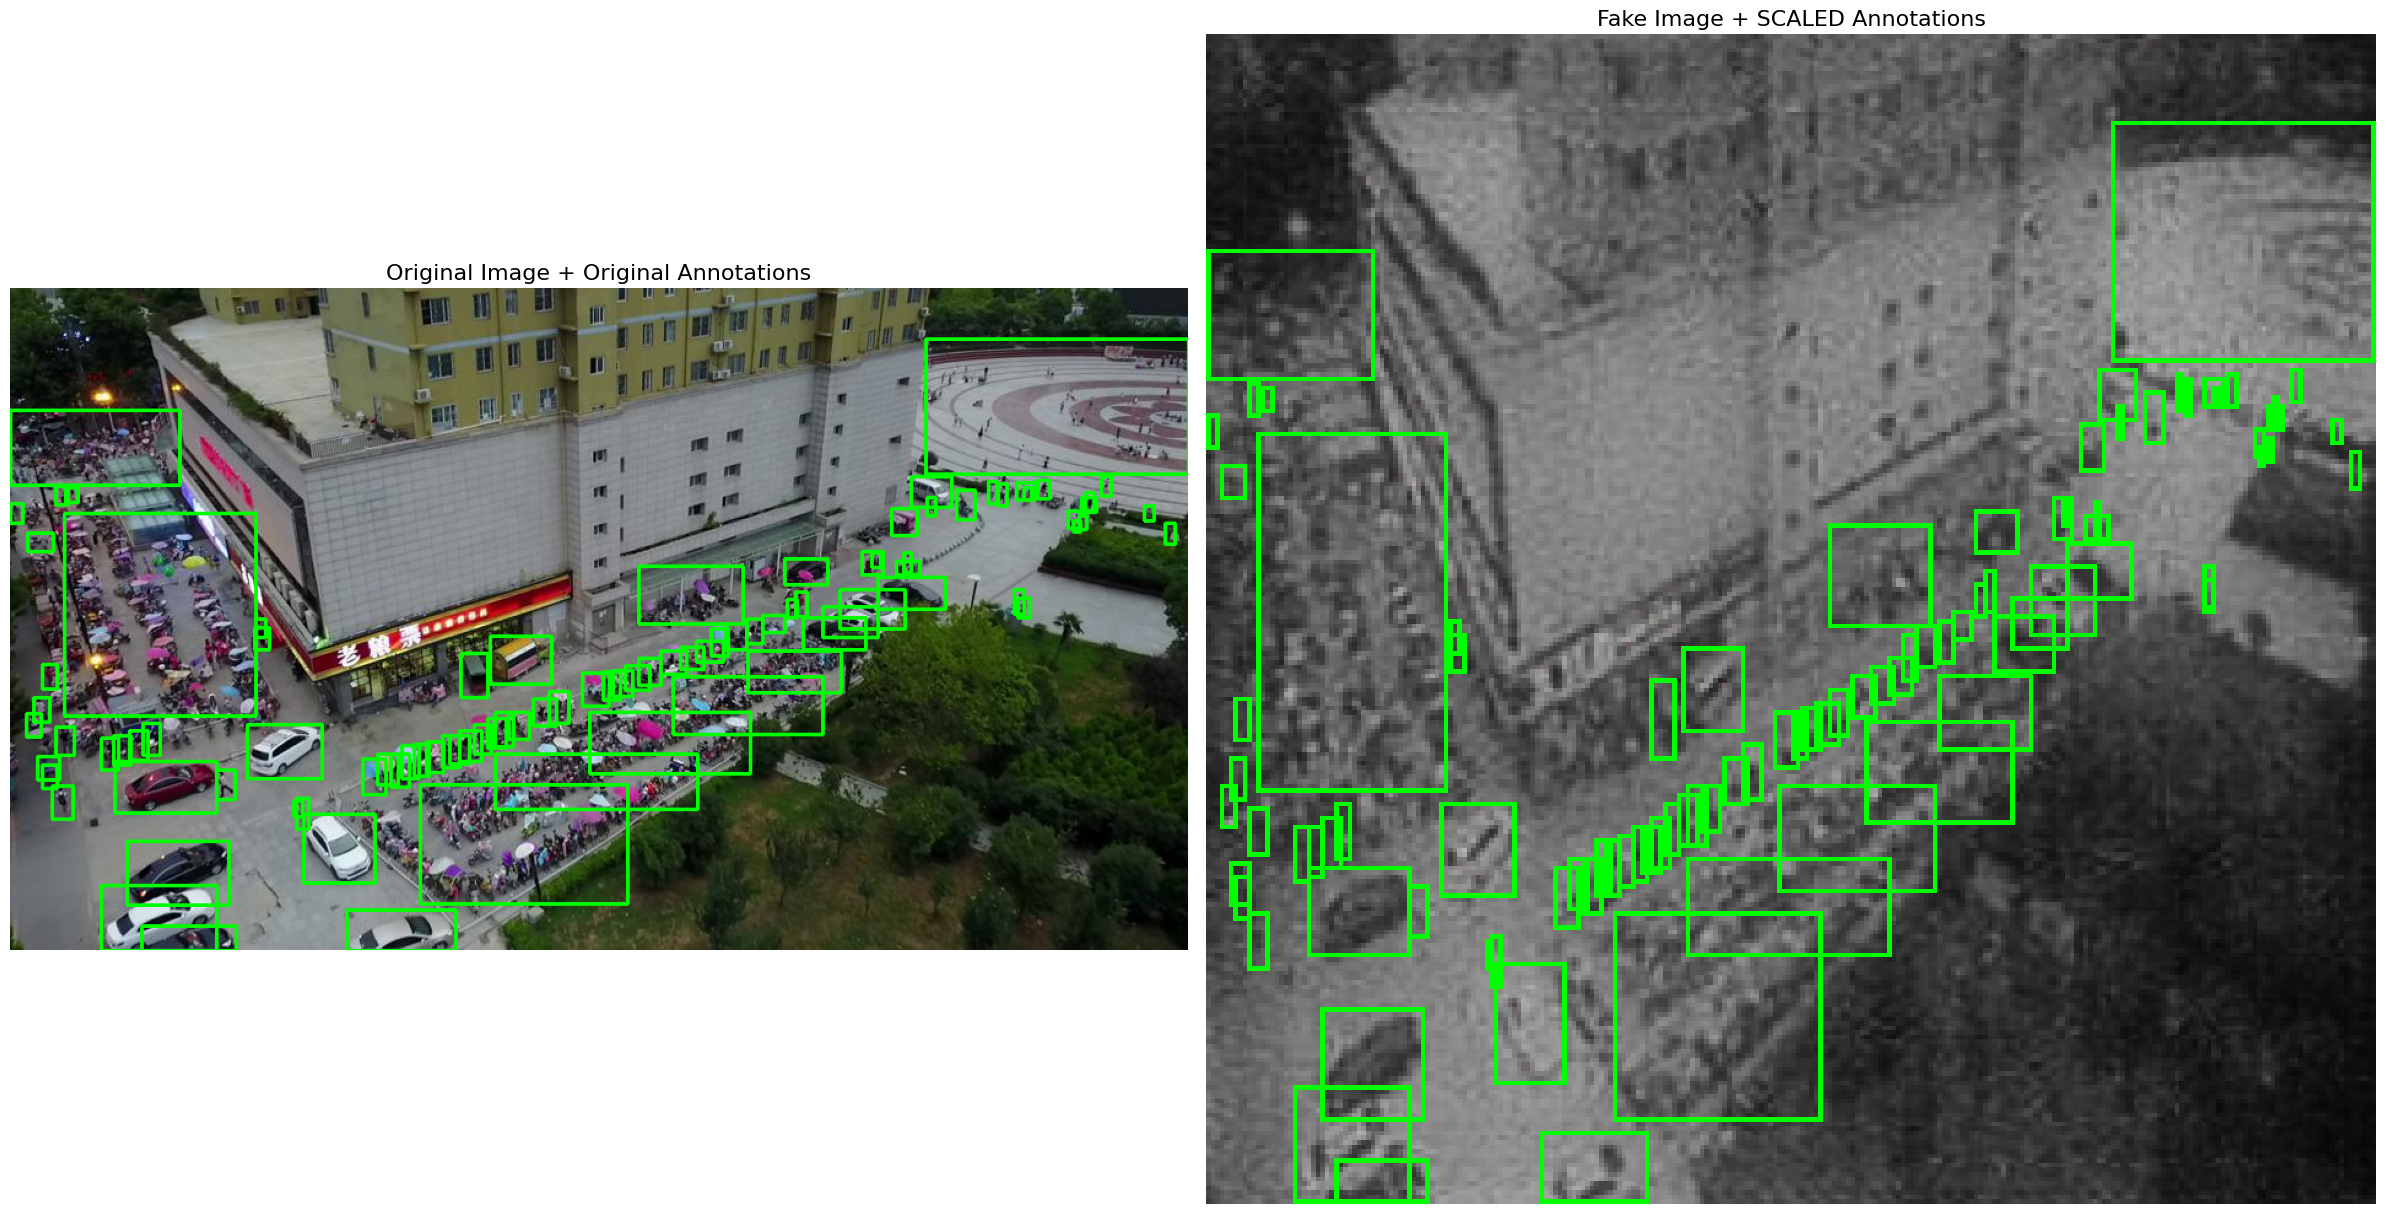

In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

# --- 1. Define File Names ---
original_image_path = '0000002_00448_d_0000015.jpg'
fake_image_path = '0000002_00448_d_0000015_fake.png'
annotation_path = '0000002_00448_d_0000015.txt'

# --- 2. Check if files exist ---
if not all(os.path.exists(p) for p in [original_image_path, annotation_path, fake_image_path]):
    print("❌ ERROR: One or more files are missing!")
    print(f"Please make sure you have uploaded all three files to Colab.")
else:
    print("✅ Files found. Processing...")

    # --- 3. Get Image Dimensions using PIL ---
    original_pil = Image.open(original_image_path)
    original_width, original_height = original_pil.size

    fake_pil = Image.open(fake_image_path)
    fake_width, fake_height = fake_pil.size

    print(f"Original Size: {original_width}w x {original_height}h")
    print(f"Fake Size:     {fake_width}w x {fake_height}h")

    # --- 4. Calculate Scaling Ratios ---
    x_scale = fake_width / original_width
    y_scale = fake_height / original_height

    print(f"Scaling Factors: x_scale={x_scale:.4f}, y_scale={y_scale:.4f}")

    # --- 5. Load Annotations and Scale Them ---
    original_bboxes = [] # To draw on original image
    scaled_bboxes = []   # To draw on fake image

    with open(annotation_path, 'r') as f:
        for line in f:
            parts = line.strip().split(',')
            # VisDrone format: <x_left>,<y_top>,<width>,<height>,...
            x = int(parts[0])
            y = int(parts[1])
            w = int(parts[2])
            h = int(parts[3])
            original_bboxes.append((x, y, w, h))

            # --- This is the scaling logic ---
            # Calculate new coordinates and dimensions
            new_x = int(x * x_scale)
            new_y = int(y * y_scale)
            new_w = int(w * x_scale)
            new_h = int(h * y_scale)

            # Ensure width/height are at least 1 pixel
            new_w = max(1, new_w)
            new_h = max(1, new_h)

            scaled_bboxes.append((new_x, new_y, new_w, new_h))

    print(f"Loaded and scaled {len(original_bboxes)} annotations.")

    # --- 6. Load Images with OpenCV for Drawing ---
    original_cv = cv2.imread(original_image_path)
    fake_cv = cv2.imread(fake_image_path)

    # Ensure fake image is 3-channel (BGR) so we can draw color boxes
    if len(fake_cv.shape) == 2:
        fake_cv = cv2.cvtColor(fake_cv, cv2.COLOR_GRAY2BGR)

    # --- 7. Draw Bounding Boxes ---
    BOX_COLOR = (0, 255, 0) # Green
    BOX_THICKNESS_ORIG = 2
    BOX_THICKNESS_FAKE = 1 # Use thinner lines for the smaller image

    # Draw on original image
    for (x, y, w, h) in original_bboxes:
        cv2.rectangle(original_cv, (x, y), (x + w, y + h), BOX_COLOR, BOX_THICKNESS_ORIG)

    # Draw scaled boxes on fake image
    for (x, y, w, h) in scaled_bboxes:
        cv2.rectangle(fake_cv, (x, y), (x + w, y + h), BOX_COLOR, BOX_THICKNESS_FAKE)

    # --- 8. Display Side-by-Side ---
    # Convert from BGR (OpenCV) to RGB (Matplotlib)
    original_rgb = cv2.cvtColor(original_cv, cv2.COLOR_BGR2RGB)
    fake_rgb = cv2.cvtColor(fake_cv, cv2.COLOR_BGR2RGB)

    fig, ax = plt.subplots(1, 2, figsize=(24, 12))

    ax[0].imshow(original_rgb)
    ax[0].set_title('Original Image + Original Annotations', fontsize=16)
    ax[0].axis('off')

    ax[1].imshow(fake_rgb)
    ax[1].set_title('Fake Image + SCALED Annotations', fontsize=16)
    ax[1].axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
# --- 9. Save the Annotated Fake Image ---
output_filename = 'annotated_fake_image.png'
save_path = os.path.join(output_filename) # Saves to the Colab root directory

try:
    # Save the 'fake_cv' image (which has the boxes drawn on it)
    cv2.imwrite(save_path, fake_cv)
    print(f"\n✅ Successfully saved annotated image as: {save_path}")
    print("You can find it in the file browser on the left sidebar.")

except Exception as e:
    print(f"\n❌ ERROR saving image: {e}")


✅ Successfully saved annotated image as: annotated_fake_image.png
You can find it in the file browser on the left sidebar.


In [ ]:
# --- 1. Define New Output Paths ---
# We use a new name to avoid conflict with the first zip
scaled_dataset_path = os.path.join(temp_work_dir, 'modified_visdrone_scaled_annos')
new_scaled_images_path = os.path.join(scaled_dataset_path, 'images')
new_scaled_annotations_path = os.path.join(scaled_dataset_path, 'annotations')

# --- 2. Create the new directory structure ---
print(f"Creating new directory structure at: {scaled_dataset_path}")

# Clean up from previous runs, just in case
if os.path.exists(scaled_dataset_path):
    print("Found old 'modified_visdrone_scaled_annos' folder. Removing it.")
    shutil.rmtree(scaled_dataset_path)

os.makedirs(new_scaled_images_path, exist_ok=True)
os.makedirs(new_scaled_annotations_path, exist_ok=True)

print("✅ Output directories created.")

Creating new directory structure at: /content/visdrone_verification/modified_visdrone_scaled_annos
✅ Output directories created.


In [ ]:
from tqdm.auto import tqdm # For a nice progress bar
from PIL import Image

print("Starting batch processing for SCALED ANNOTATIONS...")
print(f"Source Images: {original_images_path}")
print(f"Source Annotations: {original_annotations_path}")
print(f"Fake Image Source: {fake_images_path}")
print(f"Destination Images: {new_scaled_images_path}")
print(f"Destination Annotations: {new_scaled_annotations_path}")

# Get a list of all original image files
original_image_files = glob.glob(os.path.join(original_images_path, '*.jpg'))

if not original_image_files:
    print(f"❌ ERROR: No .jpg files found in {original_images_path}. Check paths.")
else:
    print(f"Found {len(original_image_files)} files to process.")

    missing_fakes = 0

    # Loop through every original image
    for original_img_path in tqdm(original_image_files, desc="Processing images"):

        # e.g., "0000002_00448_d_0000015.jpg"
        base_filename = os.path.basename(original_img_path)

        # e.g., "0000002_00448_d_0000015"
        filename_no_ext = os.path.splitext(base_filename)[0]

        # --- 1. Define all paths for this file ---
        original_anno_path = os.path.join(original_annotations_path, f"{filename_no_ext}.txt")

        # Final output paths
        output_img_path = os.path.join(new_scaled_images_path, base_filename)
        output_anno_path = os.path.join(new_scaled_annotations_path, f"{filename_no_ext}.txt")

        # Find the corresponding fake image (could be .png or .jpg)
        fake_img_path = None
        fake_png = os.path.join(fake_images_path, f"{filename_no_ext}_fake.png")
        fake_jpg = os.path.join(fake_images_path, f"{filename_no_ext}_fake.jpg")

        if os.path.exists(fake_png):
            fake_img_path = fake_png
        elif os.path.exists(fake_jpg):
            fake_img_path = fake_jpg

        # --- 2. Process if all files exist ---
        if fake_img_path and os.path.exists(original_anno_path):
            try:
                # --- 3. Get Image Dimensions ---
                with Image.open(original_img_path) as original_img:
                    original_width, original_height = original_img.size

                with Image.open(fake_img_path) as fake_img:
                    fake_width, fake_height = fake_img.size

                    # --- 4. TASK (Images): Save fake image (un-resized) with original name ---
                    # We .convert('RGB') and save as 'JPEG' to normalize
                    # .png files to .jpg, matching the new filename.
                    fake_img.convert('RGB').save(output_img_path, 'JPEG')

                # --- 5. Calculate Scaling Ratios ---
                x_scale = fake_width / original_width
                y_scale = fake_height / original_height

                # --- 6. TASK (Annotations): Read, Scale, and Write New Annotations ---
                new_anno_lines = []
                with open(original_anno_path, 'r') as f_in:
                    for line in f_in:
                        parts = line.strip().split(',')

                        # Get original coords
                        x = int(parts[0])
                        y = int(parts[1])
                        w = int(parts[2])
                        h = int(parts[3])
                        # Keep the rest of the data (class, score, etc.)
                        rest_of_line = parts[4:]

                        # Scale coords
                        new_x = int(x * x_scale)
                        new_y = int(y * y_scale)
                        new_w = int(w * x_scale)
                        new_h = int(h * y_scale)

                        # Ensure width/height are at least 1 pixel
                        new_w = max(1, new_w)
                        new_h = max(1, new_h)

                        # Build new line
                        new_parts = [str(new_x), str(new_y), str(new_w), str(new_h)] + rest_of_line
                        new_anno_lines.append(','.join(new_parts))

                # Write all new lines to the new annotation file
                with open(output_anno_path, 'w') as f_out:
                    f_out.write('\n'.join(new_anno_lines))

            except Exception as e:
                print(f"Error processing {base_filename}: {e}")
        else:
            if not fake_img_path: missing_fakes += 1
            if not os.path.exists(original_anno_path): print(f"Warning: Missing annotation for {base_filename}")

    print(f"✅ Image and annotation processing complete.")
    if missing_fakes > 0:
        print(f"Total missing fake images: {missing_fakes}")

Starting batch processing for SCALED ANNOTATIONS...
Source Images: /content/visdrone_verification/VisDrone2019-DET-train/images
Source Annotations: /content/visdrone_verification/VisDrone2019-DET-train/annotations
Fake Image Source: /content/visdrone_verification/pix2pix_results/content/pytorch-CycleGAN-and-pix2pix/results/nightvision_pix2pix/test_latest/images
Destination Images: /content/visdrone_verification/modified_visdrone_scaled_annos/images
Destination Annotations: /content/visdrone_verification/modified_visdrone_scaled_annos/annotations
Found 6471 files to process.


Processing images:   0%|          | 0/6471 [00:00<?, ?it/s]

✅ Image and annotation processing complete.


In [ ]:
print("Zipping the final dataset with scaled annotations...")

# (Uses 'drive_base_path' and 'temp_work_dir' from Cell 1)

# Path for the final zip file in Google Drive, *without* the .zip extension
output_zip_base_path = os.path.join(drive_base_path, 'modified_visdrone_scaled_annos')

try:
    # This command zips the 'modified_visdrone_scaled_annos' folder
    shutil.make_archive(
        base_name=output_zip_base_path,     # Final name: /content/drive/My Drive/modified_visdrone_scaled_annos
        format='zip',                       # Format: .zip
        root_dir=temp_work_dir,             # The folder *containing* what we want to zip
        base_dir='modified_visdrone_scaled_annos' # The folder *to* zip
    )

    print("---" * 20)
    print(f"✅ SUCCESS! File saved to: {output_zip_base_path}.zip")
    print("You can find it in the root of your 'My Drive' folder.")
    print("---" * 20)

    # Optional: Flush and unmount to force sync
    # drive.flush_and_unmount()

except Exception as e:
    print(f"❌ ERROR: Failed to create zip file: {e}")

Zipping the final dataset with scaled annotations...
------------------------------------------------------------
✅ SUCCESS! File saved to: /content/drive/My Drive/modified_visdrone_scaled_annos.zip
You can find it in the root of your 'My Drive' folder.
------------------------------------------------------------


In [ ]:
import os
import zipfile
import shutil
import glob
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from tqdm.auto import tqdm

# --- 1. Mount Google Drive (if not already mounted) ---
print("Mounting Google Drive...")
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')
else:
    print("Drive already mounted.")

# --- 2. Define All VAL Paths ---
drive_base_path = '/content/drive/My Drive'
# We use a new temp directory to keep 'val' separate from 'train'
temp_work_dir_val = '/content/visdrone_verification_val'

# --- Source Zip Paths ---
visdrone_zip_path_val = os.path.join(drive_base_path, 'VisDrone2019-DET-val.zip')
pix2pix_zip_path_val = os.path.join(drive_base_path, 'pix2pix_results_val.zip')

# --- Unzipped Folder Structures ---
# This assumes the val zip unzips to 'VisDrone2019-DET-val'
visdrone_unzip_dir_val = os.path.join(temp_work_dir_val, 'VisDrone2019-DET-val')
pix2pix_unzip_dir_val = os.path.join(temp_work_dir_val, 'pix2pix_results_val')

# --- Specific Content Paths ---
original_images_path_val = os.path.join(visdrone_unzip_dir_val, 'images')
original_annotations_path_val = os.path.join(visdrone_unzip_dir_val, 'annotations')
# Assuming same internal structure for the pix2pix results zip
fake_images_path_val = os.path.join(pix2pix_unzip_dir_val, 'content/pytorch-CycleGAN-and-pix2pix/results/nightvision_pix2pix/test_latest/images')

print("✅ VAL paths configured.")

Mounting Google Drive...
Mounted at /content/drive
✅ VAL paths configured.


In [ ]:
# --- 3. Create local directories for VAL ---
os.makedirs(temp_work_dir_val, exist_ok=True)
print(f"Working directory created at: {temp_work_dir_val}")

# --- 4. Unzip VisDrone VAL (if not already unzipped) ---
if not os.path.exists(visdrone_unzip_dir_val):
    print(f"Unzipping {visdrone_zip_path_val}...")
    try:
        with zipfile.ZipFile(visdrone_zip_path_val, 'r') as zip_ref:
            zip_ref.extractall(temp_work_dir_val)
        print("VisDrone VAL unzipped successfully.")
    except FileNotFoundError:
        print(f"❌ ERROR: File not found at {visdrone_zip_path_val}")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("VisDrone VAL folder already exists. Skipping unzip.")

# --- 5. Unzip Pix2Pix Results VAL (if not already unzipped) ---
if not os.path.exists(pix2pix_unzip_dir_val):
    print(f"Unzipping {pix2pix_zip_path_val}...")
    try:
        with zipfile.ZipFile(pix2pix_zip_path_val, 'r') as zip_ref:
            zip_ref.extractall(pix2pix_unzip_dir_val)
        print("Pix2pix results VAL unzipped successfully.")
    except FileNotFoundError:
        print(f"❌ ERROR: File not found at {pix2pix_zip_path_val}")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("Pix2pix results VAL folder already exists. Skipping unzip.")

print("\n✅ VAL Setup complete. You can now process the files.")

Working directory created at: /content/visdrone_verification_val
Unzipping /content/drive/My Drive/VisDrone2019-DET-val.zip...
VisDrone VAL unzipped successfully.
Unzipping /content/drive/My Drive/pix2pix_results_val.zip...
Pix2pix results VAL unzipped successfully.

✅ VAL Setup complete. You can now process the files.


In [ ]:
# --- 1. Define Output Paths for Task 1 ---
modified_dataset_path_val = os.path.join(temp_work_dir_val, 'modified_visdrone_val')
new_images_path_val = os.path.join(modified_dataset_path_val, 'images')
new_annotations_path_val = os.path.join(modified_dataset_path_val, 'annotations')

# --- 2. Create the new directory structure ---
print(f"Creating new directory structure at: {modified_dataset_path_val}")
if os.path.exists(modified_dataset_path_val):
    shutil.rmtree(modified_dataset_path_val)

os.makedirs(new_images_path_val, exist_ok=True)
os.makedirs(new_annotations_path_val, exist_ok=True)

print("✅ VAL output directories created for Task 1.")

Creating new directory structure at: /content/visdrone_verification_val/modified_visdrone_val
✅ VAL output directories created for Task 1.


In [ ]:
print(f"Copying VAL annotations from: {original_annotations_path_val}")
print(f"Copying VAL annotations to:   {new_annotations_path_val}")

try:
    shutil.copytree(original_annotations_path_val, new_annotations_path_val, dirs_exist_ok=True)
    print(f"✅ Successfully copied all VAL annotations.")
except Exception as e:
    print(f"❌ ERROR copying VAL annotations: {e}")

Copying VAL annotations from: /content/visdrone_verification_val/VisDrone2019-DET-val/annotations
Copying VAL annotations to:   /content/visdrone_verification_val/modified_visdrone_val/annotations
✅ Successfully copied all VAL annotations.


In [ ]:
print("Starting batch processing of all VAL images (Resizing)...")
original_image_files_val = glob.glob(os.path.join(original_images_path_val, '*.jpg'))

if not original_image_files_val:
    print(f"❌ ERROR: No .jpg files found in {original_images_path_val}.")
else:
    print(f"Found {len(original_image_files_val)} original VAL images to process.")
    missing_fakes = 0

    for original_img_path in tqdm(original_image_files_val, desc="Processing VAL (Task 1)"):
        base_filename = os.path.basename(original_img_path)
        filename_no_ext = os.path.splitext(base_filename)[0]
        output_img_path = os.path.join(new_images_path_val, base_filename)

        # --- Find the corresponding fake image ---
        fake_img_path = None
        fake_png = os.path.join(fake_images_path_val, f"{filename_no_ext}_fake.png")
        fake_jpg = os.path.join(fake_images_path_val, f"{filename_no_ext}_fake.jpg")
        if os.path.exists(fake_png): fake_img_path = fake_png
        elif os.path.exists(fake_jpg): fake_img_path = fake_jpg

        if fake_img_path:
            try:
                with Image.open(original_img_path) as original_img:
                    original_size = original_img.size
                with Image.open(fake_img_path) as fake_img:
                    resized_fake_img = fake_img.resize(original_size, Image.LANCZOS).convert('RGB')
                    resized_fake_img.save(output_img_path, 'JPEG')
            except Exception as e:
                print(f"Error processing {base_filename}: {e}")
        else:
            missing_fakes += 1

    print(f"✅ VAL image processing complete (Task 1).")
    if missing_fakes > 0: print(f"Total missing fake VAL images: {missing_fakes}")

Starting batch processing of all VAL images (Resizing)...
Found 548 original VAL images to process.


Processing VAL (Task 1):   0%|          | 0/548 [00:00<?, ?it/s]

✅ VAL image processing complete (Task 1).


In [ ]:
print("Zipping the final VAL dataset (Task 1)...")
output_zip_base_path = os.path.join(drive_base_path, 'modified_visdrone_val')

try:
    shutil.make_archive(
        base_name=output_zip_base_path,
        format='zip',
        root_dir=temp_work_dir_val,
        base_dir='modified_visdrone_val'
    )
    print("---" * 20)
    print(f"✅ SUCCESS! File saved to: {output_zip_base_path}.zip")
    print("---" * 20)
except Exception as e:
    print(f"❌ ERROR: Failed to create zip file: {e}")

Zipping the final VAL dataset (Task 1)...
------------------------------------------------------------
✅ SUCCESS! File saved to: /content/drive/My Drive/modified_visdrone_val.zip
------------------------------------------------------------


In [ ]:
# --- 1. Define Output Paths for Task 2 ---
scaled_dataset_path_val = os.path.join(temp_work_dir_val, 'modified_visdrone_scaled_annos_val')
new_scaled_images_path_val = os.path.join(scaled_dataset_path_val, 'images')
new_scaled_annotations_path_val = os.path.join(scaled_dataset_path_val, 'annotations')

# --- 2. Create the new directory structure ---
print(f"Creating new directory structure at: {scaled_dataset_path_val}")
if os.path.exists(scaled_dataset_path_val):
    shutil.rmtree(scaled_dataset_path_val)

os.makedirs(new_scaled_images_path_val, exist_ok=True)
os.makedirs(new_scaled_annotations_path_val, exist_ok=True)

print("✅ VAL output directories created for Task 2.")

Creating new directory structure at: /content/visdrone_verification_val/modified_visdrone_scaled_annos_val
✅ VAL output directories created for Task 2.


In [ ]:
print("Starting batch processing for SCALED VAL ANNOTATIONS (Task 2)...")
original_image_files_val = glob.glob(os.path.join(original_images_path_val, '*.jpg'))

if not original_image_files_val:
    print(f"❌ ERROR: No .jpg files found in {original_images_path_val}.")
else:
    print(f"Found {len(original_image_files_val)} files to process.")
    missing_fakes = 0

    for original_img_path in tqdm(original_image_files_val, desc="Processing VAL (Task 2)"):
        base_filename = os.path.basename(original_img_path)
        filename_no_ext = os.path.splitext(base_filename)[0]

        # --- 1. Define all paths for this file ---
        original_anno_path = os.path.join(original_annotations_path_val, f"{filename_no_ext}.txt")
        output_img_path = os.path.join(new_scaled_images_path_val, base_filename)
        output_anno_path = os.path.join(new_scaled_annotations_path_val, f"{filename_no_ext}.txt")

        # Find fake image
        fake_img_path = None
        fake_png = os.path.join(fake_images_path_val, f"{filename_no_ext}_fake.png")
        fake_jpg = os.path.join(fake_images_path_val, f"{filename_no_ext}_fake.jpg")
        if os.path.exists(fake_png): fake_img_path = fake_png
        elif os.path.exists(fake_jpg): fake_img_path = fake_jpg

        # --- 2. Process if all files exist ---
        if fake_img_path and os.path.exists(original_anno_path):
            try:
                # --- 3. Get Image Dimensions ---
                with Image.open(original_img_path) as original_img:
                    original_width, original_height = original_img.size

                with Image.open(fake_img_path) as fake_img:
                    fake_width, fake_height = fake_img.size
                    # --- 4. TASK (Images): Save fake image (un-resized) with original name ---
                    fake_img.convert('RGB').save(output_img_path, 'JPEG')

                # --- 5. Calculate Scaling Ratios ---
                x_scale = fake_width / original_width
                y_scale = fake_height / original_height

                # --- 6. TASK (Annotations): Read, Scale, and Write New Annotations ---
                new_anno_lines = []
                with open(original_anno_path, 'r') as f_in:
                    for line in f_in:
                        parts = line.strip().split(',')
                        x, y, w, h = int(parts[0]), int(parts[1]), int(parts[2]), int(parts[3])
                        rest_of_line = parts[4:]

                        new_x, new_y = int(x * x_scale), int(y * y_scale)
                        new_w, new_h = max(1, int(w * x_scale)), max(1, int(h * y_scale))

                        new_parts = [str(new_x), str(new_y), str(new_w), str(new_h)] + rest_of_line
                        new_anno_lines.append(','.join(new_parts))

                with open(output_anno_path, 'w') as f_out:
                    f_out.write('\n'.join(new_anno_lines))

            except Exception as e:
                print(f"Error processing {base_filename}: {e}")
        else:
            if not fake_img_path: missing_fakes += 1
            if not os.path.exists(original_anno_path): print(f"Warning: Missing annotation for {base_filename}")

    print(f"✅ VAL Image and annotation processing complete (Task 2).")
    if missing_fakes > 0: print(f"Total missing fake VAL images: {missing_fakes}")

Starting batch processing for SCALED VAL ANNOTATIONS (Task 2)...
Found 548 files to process.


Processing VAL (Task 2):   0%|          | 0/548 [00:00<?, ?it/s]

✅ VAL Image and annotation processing complete (Task 2).


In [ ]:
print("Zipping the final VAL dataset with scaled annotations (Task 2)...")
output_zip_base_path = os.path.join(drive_base_path, 'modified_visdrone_scaled_annos_val')

try:
    shutil.make_archive(
        base_name=output_zip_base_path,
        format='zip',
        root_dir=temp_work_dir_val,
        base_dir='modified_visdrone_scaled_annos_val'
    )

    print("---" * 20)
    print(f"✅ SUCCESS! File saved to: {output_zip_base_path}.zip")
    print("You can find both new zip files in the root of your 'My Drive' folder.")
    print("---" * 20)

except Exception as e:
    print(f"❌ ERROR: Failed to create zip file: {e}")

Zipping the final VAL dataset with scaled annotations (Task 2)...
------------------------------------------------------------
✅ SUCCESS! File saved to: /content/drive/My Drive/modified_visdrone_scaled_annos_val.zip
You can find both new zip files in the root of your 'My Drive' folder.
------------------------------------------------------------
